In [1]:
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
import re
url = 'https://en.wikipedia.org/wiki/North_Carolina'
bsObj = BeautifulSoup(urlopen(url).read())

In [2]:
# Gets data for normal monthly high temperatures
temperature_table = bsObj.find('table', class_='wikitable')
#print(temperature_table)

temps = []
cities = []
monthnames = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
             'November', 'December']


for row in temperature_table.find_all('tr'):
    if len(row.find_all('th')) == 1 and len(row.find_all('td')) == 12:
        city = row.find('th')
        cities.append(city.find(text=True))
        
        cells = row.find_all('td')
        citytemps = []
        for i in range(0, len(cells)):
            monthtemp = cells[i].find(text=True)
            monthtemp = int(monthtemp[0:monthtemp.find('/')])
            citytemps.append(monthtemp)
        temps.append(citytemps)
        
df = pd.DataFrame(index=monthnames)
for i in range(0, len(cities)):
    df[cities[i]] = temps[i]

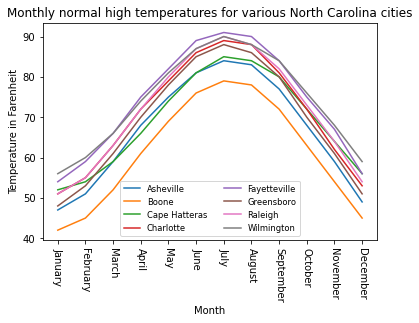

In [3]:
# Plots monthly normal high temperatures
for i in range(0, len(temps)):
    plt.plot(df[cities[i]], label=cities[i])
    
#(help(plt.legend))
plt.legend(loc='lower center', ncol=2, fontsize='small')
plt.xticks(rotation=270)
plt.title("Monthly normal high temperatures for various North Carolina cities")
plt.xlabel("Month")
plt.ylabel("Temperature in Farenheit")
plt.show()

In [4]:
# Gets Climate Data
climate_table = bsObj.find('table', class_='wikitable collapsible')
temps = []
statnames = []
limit = 5
counter = 0

for row in climate_table.find_all('tr'):
    if (counter < limit and len(row.find_all('th')) == 1 and len(row.find_all('td')) == 13):
        statname = row.find('th').find(text=True)
        statnames.append(statname[0:statname.find('°F') - 1])
        
        # Gets temperature data
        temp_list = []
        for i in row.find_all('td'):
            if (len(temp_list) < 12):
                value = (i.find(text=True).replace(chr(8722), '-'))
                temp_list.append(float(value))
        
        temps.append(temp_list)
        counter += 1
        
df = pd.DataFrame(index=monthnames)
for i in range(0, len(statnames)):
    df[statnames[i]] = temps[i]


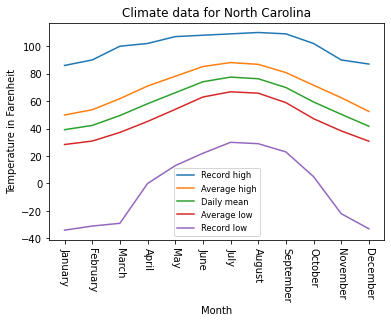

In [5]:
# Plotting climate data
for i in df.columns.tolist():
    plt.plot(df[i], label=i)
    
plt.legend(fontsize='small')
plt.xticks(rotation=270)
plt.xlabel("Month")
plt.ylabel("Temperature in Farenheit")
plt.title("Climate data for North Carolina")
plt.show()


In [6]:
# Racial Breakdown of Population
racial_breakdown = bsObj.find('table', class_='wikitable sortable collapsible')
years = []
races = []
percentages = []

# Gets racial breakdown data
for row in racial_breakdown.find_all('tr'):
    if (len(row.find_all('th')) == 4):
        # Adds years listed in table to years list
        for i in range(1, 4):
            years.append(row.find_all('th')[i].find(text=True))
            
    elif (len(row.find_all('td')) == 4):
        # Adds this row's race to races list
        cells = row.find_all('td')
        races.append(cells[0].find(text=True))
        
        # Adds this row's percentages to percentages list
        percent_list = []
        for i in range(1, 4):
            if (cells[i].find(text=True) != '–'):
                percent_list.append(float(cells[i].find(text=True)[0:cells[i].find(text=True).index('%')]))
            elif (cells[i].find(text=True) == '–'):
                percent_list.append(None)
        percentages.append(percent_list)
        
# Adds data to a DataFrame
df = pd.DataFrame(index=years)
for i in range(0, len(races)):
    df[races[i]] = percentages[i]
    

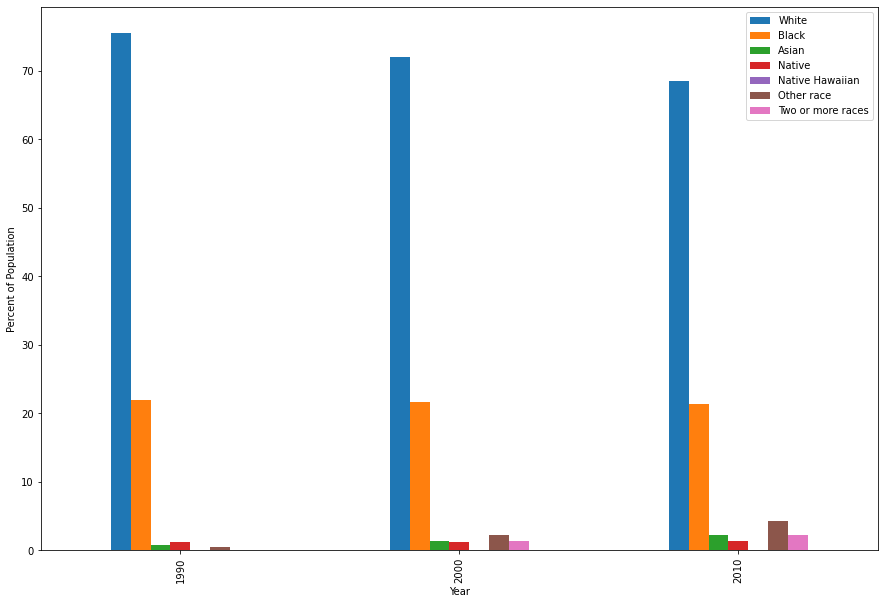

In [7]:
# Plots racial breakdown of population
df[[i for i in df.columns.tolist()]].plot(kind="bar", figsize=(15, 10))

plt.xlabel("Year")
plt.ylabel("Percent of Population")
plt.show()


In [8]:
# Non-English Languages
# Gets data for Non-English languages
languages = []
percentages = []

speaker_table = bsObj.find('table', class_='wikitable sortable')

for row in speaker_table.find_all('tr'):
    cells = row.find_all('td')
    if(len(cells) == 2):
        languages.append(cells[0].find(text=True))
        percentage_string = cells[1].find(text=True)
        percentages.append(float(percentage_string[0:percentage_string.index('%')]))
        
# Puts data in a dataframe
df = pd.DataFrame({"Percentage of population" : percentages}, index=languages)



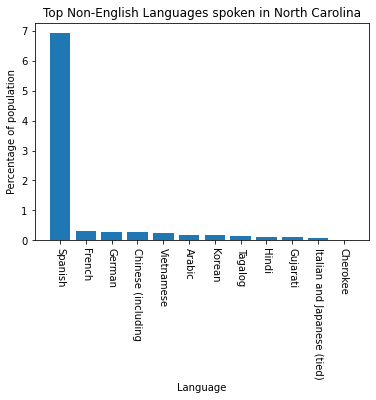

In [9]:
# Plots top non-English spoken languages
#print(df.index.tolist())
plt.bar(df.index.tolist(), df["Percentage of population"])
plt.xticks(rotation=270)
plt.title("Top Non-English Languages spoken in North Carolina")
plt.xlabel("Language")
plt.ylabel("Percentage of population")
plt.show()

In [10]:
# Historical Population

years = []
populations = []


historical_population = bsObj.find('table', class_='toccolours')

#print(historical_population.prettify())
for row in historical_population.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) == 4:
        years.append(cells[0].find(text=True))
        populations.append(int(cells[1].find(text=True).replace(',', '')))
        
# Formats year data from table. Done here for readability.
for i in range(0, len(years)):
    years[i] = int(re.sub('\D', '', years[i]))

df = pd.DataFrame({'population' : populations}, index = years)


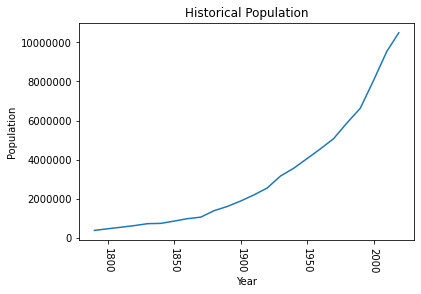

In [11]:
# Graphs population data
plt.plot(df)
plt.gca().ticklabel_format(axis='y', style='plain')
plt.title("Historical Population")
plt.xticks(rotation=270)
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()
